In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [31]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt"

In [32]:
data_employee = pd.read_csv(url)

In [33]:
data_employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
data_employee.shape

(14999, 10)

In [35]:
data_employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [36]:
data_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
data_employee.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [38]:
data_employee.drop(['sales'],axis=1,inplace=True)

In [40]:
salary =  pd.get_dummies(data_employee['salary'],drop_first=True)

In [41]:
salary

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [43]:
data_employee = pd.concat([data_employee,salary],axis=1)

In [45]:
data_employee.drop(['salary'],axis=1,inplace=True)

In [46]:
data_employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


<AxesSubplot:>

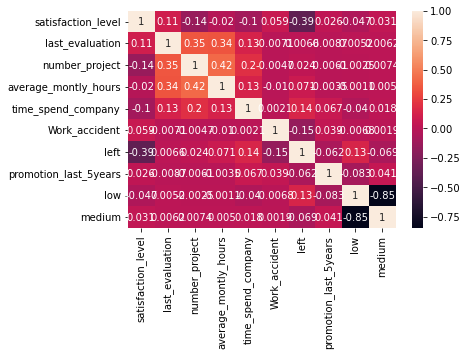

In [47]:
sns.heatmap(data_employee.corr(),annot=True)

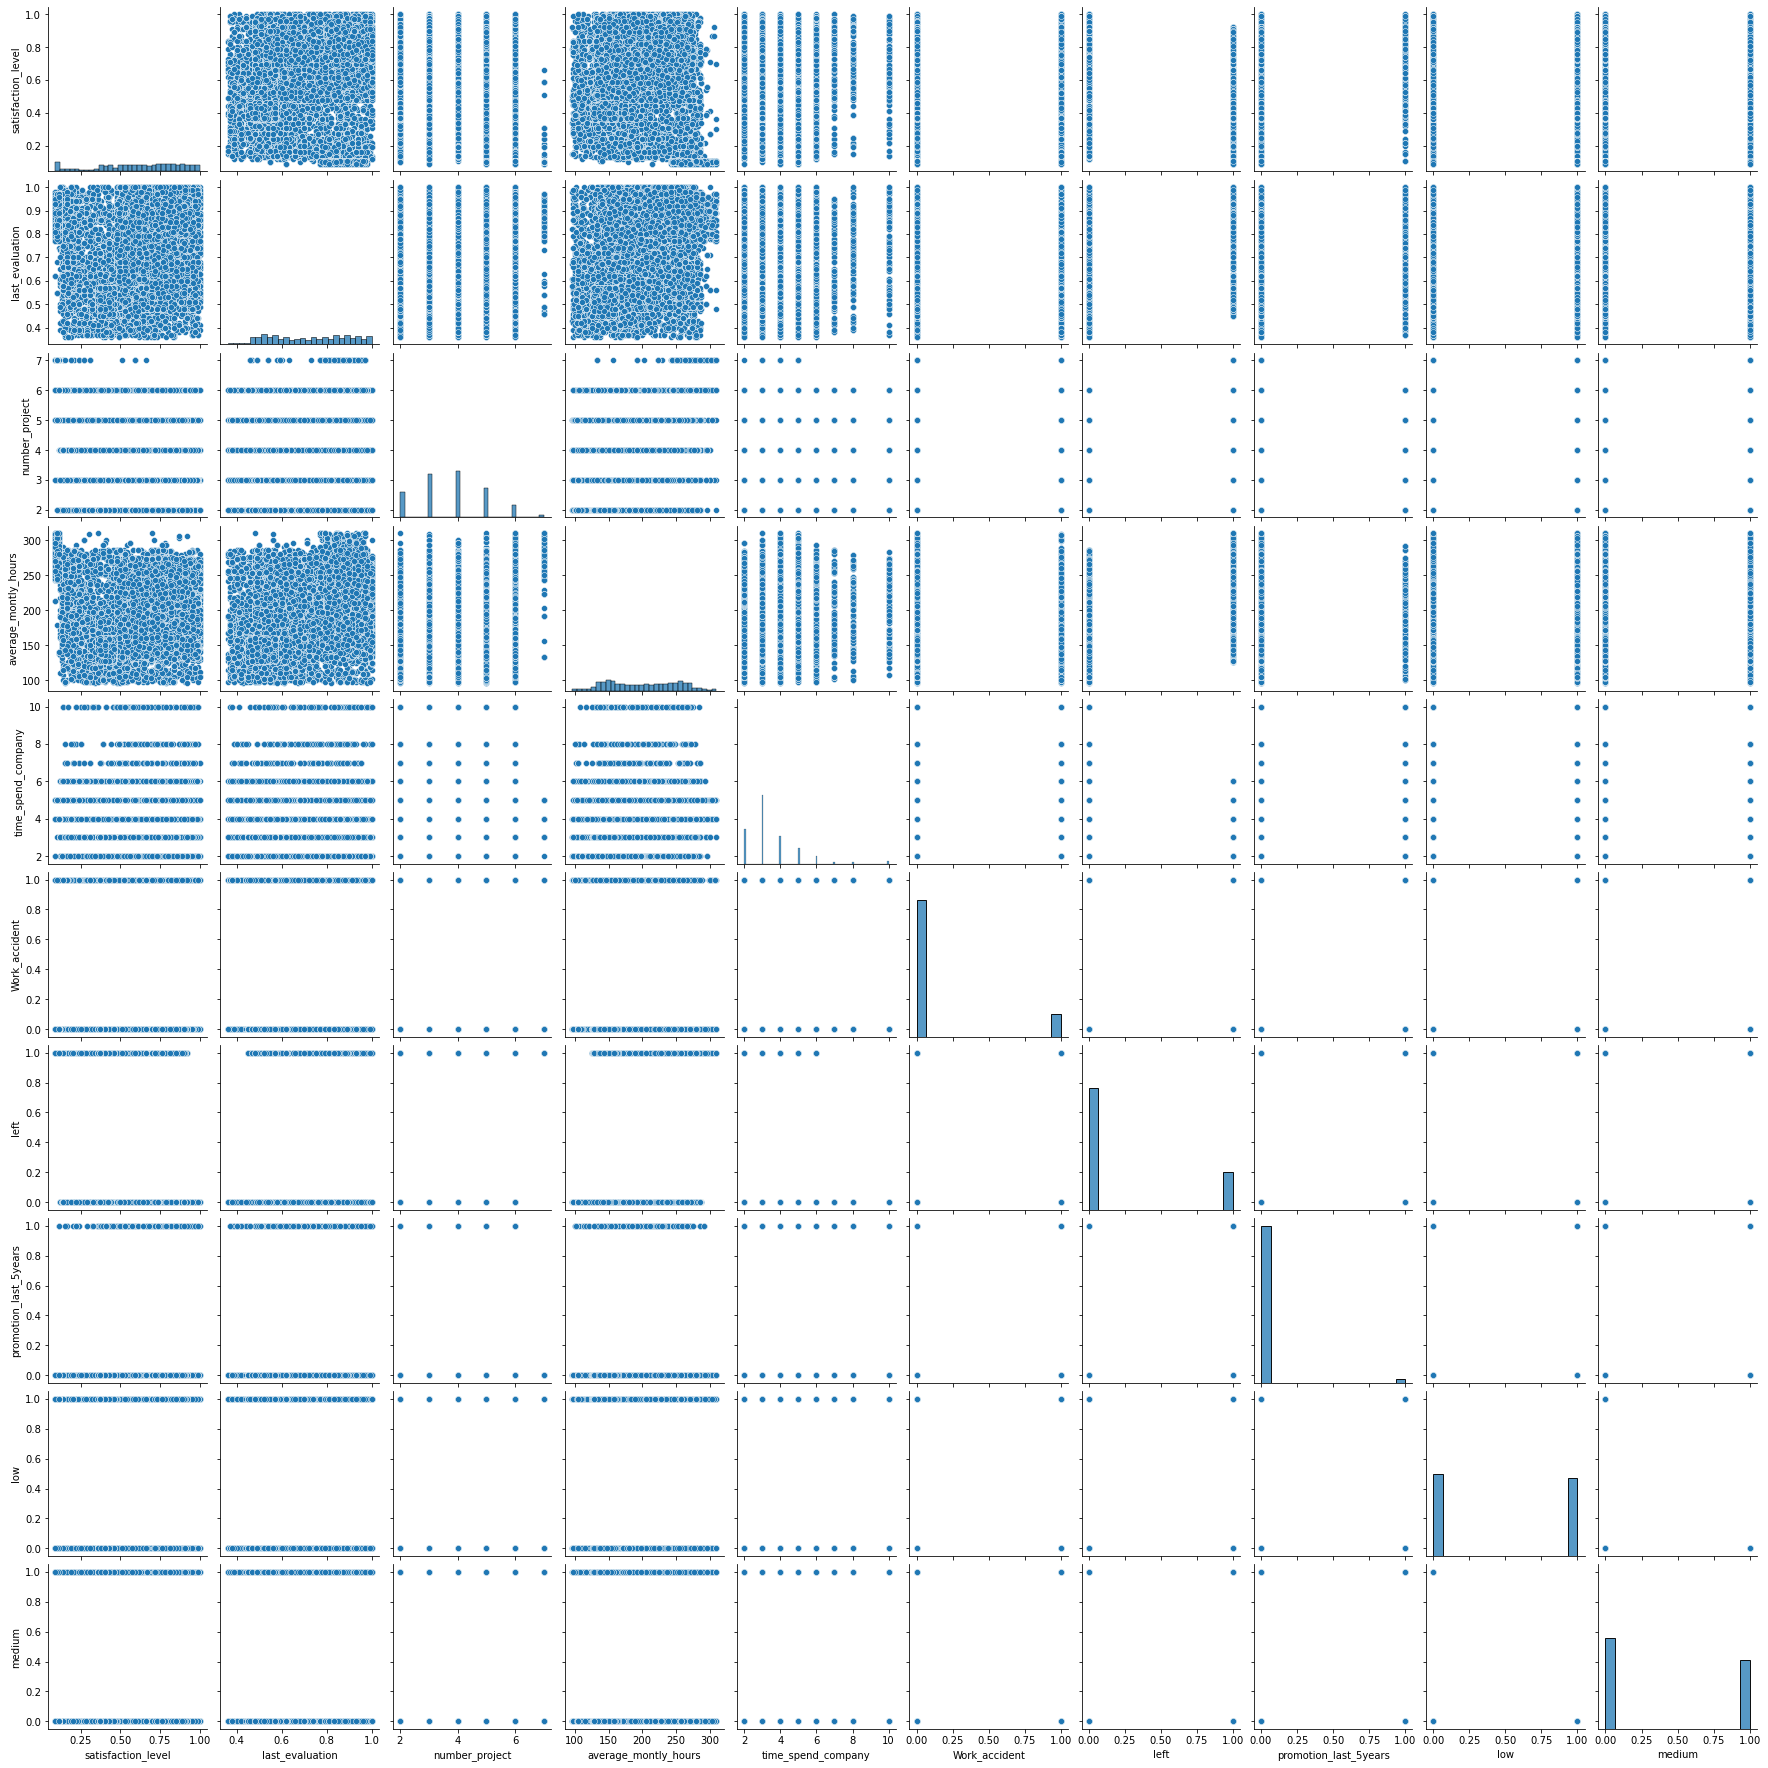

In [48]:
sns.pairplot(data_employee)

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

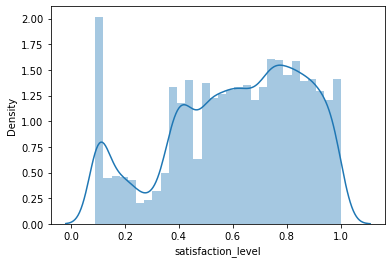

In [50]:
sns.distplot(data_employee['satisfaction_level'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

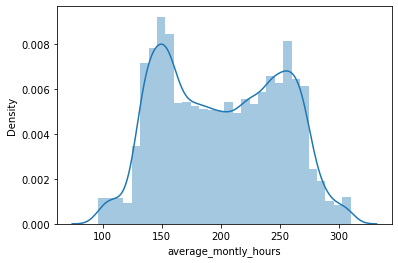

In [52]:
sns.distplot(data_employee['average_montly_hours'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

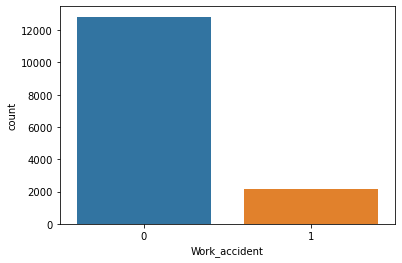

In [53]:
sns.countplot(data_employee['Work_accident'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

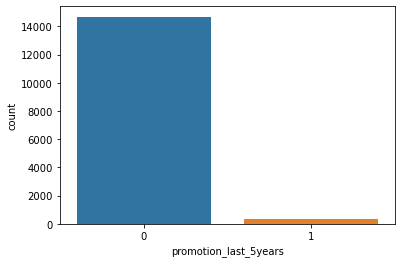

In [54]:
sns.countplot(data_employee['promotion_last_5years'])

In [55]:
x = data_employee.drop(['left'],axis=1)
y = data_employee['left']

In [56]:
ss = StandardScaler()

In [57]:
ss.fit_transform(x)

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.14741182,
         1.02477511, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.14741182,
        -0.97582386,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.14741182,
        -0.97582386,  1.15189816],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.14741182,
         1.02477511, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.14741182,
         1.02477511, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.14741182,
         1.02477511, -0.8681323 ]])

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [61]:
dc = DecisionTreeClassifier()

In [62]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
y_pred = dc.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [67]:
accuracy_score(y_pred,y_test)

0.9748888888888889

In [68]:
confusion_matrix(y_pred,y_test)

array([[3355,   60],
       [  53, 1032]], dtype=int64)

In [70]:
from sklearn import tree

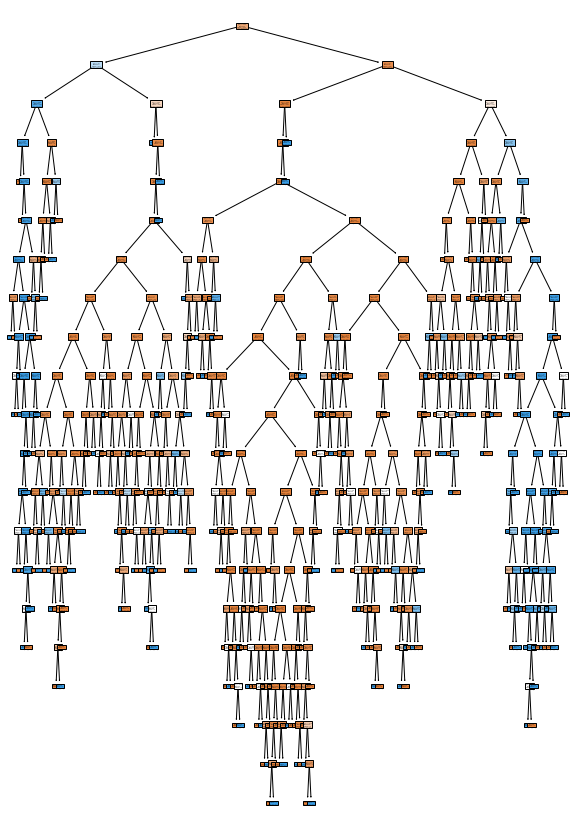

In [71]:
plt.figure(figsize=(10,15))
tree.plot_tree(dc,filled=True)
plt.show()